## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Linear Regression

In [2]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error

### Classification

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay



## Read Data

,0,1,2,3,4
gender,0.0,0.0,1.0,1.0,0.0
customer_type,1.0,0.0,1.0,1.0,1.0
age,13.0,25.0,26.0,25.0,61.0
type_of_travel,0.0,1.0,1.0,1.0,1.0
class,2.0,3.0,3.0,3.0,3.0
flight_distance,460.0,235.0,1142.0,562.0,214.0
inflight_wifi_service,3.0,3.0,2.0,2.0,3.0
departure/arrival_time_convenient,4.0,2.0,2.0,5.0,3.0
ease_of_online_booking,3.0,3.0,2.0,5.0,3.0
gate_location,1.0,3.0,2.0,5.0,3.0


## Decide what features to train on 

In [5]:
#create the training and testing sets
y = df['satisfaction']
X = df.drop(columns=['satisfaction'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

## k nearest neighbors

In [6]:
# #this takes a crazy amount of time to run
# scores = []
# for k in range(3, 11, 2):
#     knn = KNeighborsClassifier(n_neighbors = k)
#     knn.fit(X_train_sc, y_train)
#     train_score = knn.score(X_train_sc, y_train)
#     test_score = knn.score(X_test_sc, y_test)
#     scores.append({'k': k, 'train_score': train_score, 'test_score': test_score})

# df_score = pd.DataFrame(scores)
# df_score

In [ ]:
# y = df['satisfaction']
# X = df.drop(columns=['satisfaction'])
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# sc = StandardScaler()
# X_train_sc = sc.fit_transform(X_train)
# X_test_sc = sc.transform(X_test)
knn = KNeighborsClassifier(n_neighbors = 11)
knn.fit(X_train_sc, y_train)
train = knn.score(X_train_sc, y_train)
test = knn.score(X_test_sc, y_test)
baseline = 1-y_train.mean() #Predict everyone is not satisfied
print(f'Train Score: {train} \nTest Score: {test} \nBaseline: {baseline}')

Train Score: 0.9374044860734533 
Test Score: 0.9268917919645058 
Baseline: 0.5688686221345822


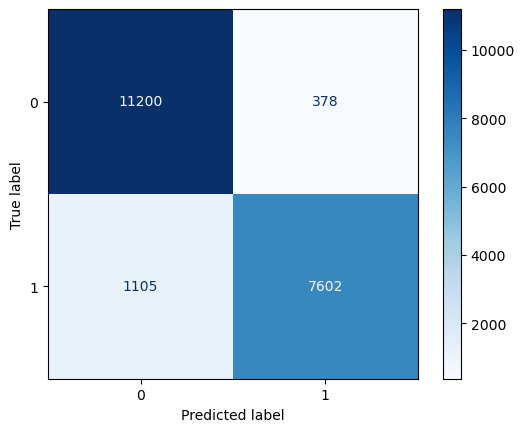

In [8]:
ConfusionMatrixDisplay.from_estimator(knn, X_test_sc, y_test, cmap = 'Blues');

### Logistic Regression

Hypothesis: logistic regression useful for the 'delay in min' factors. what is best model for only survey results.

In [11]:
model = LogisticRegression()
model.fit(X_train_sc, y_train)
train = model.score(X_train_sc, y_train)
test = model.score(X_test_sc, y_test)
print(f'Train Score: {train} \nTest Score: {test}')

Train Score: 0.8753019472516638 
Test Score: 0.8752280009859502


### Random Forest Classifier

In [12]:
model = RandomForestClassifier()
model.fit(X_train_sc, y_train)
train = model.score(X_train_sc, y_train)
test = model.score(X_test_sc, y_test)
print(f'Train Score: {train} \nTest Score: {test}')

Train Score: 1.0 
Test Score: 0.9623859995070249


In [47]:
rand_customer = df.sample(random_state=42).drop(columns=['satisfaction'])
user_input = pd.DataFrame({'inflight_wifi_service': [1],
                            'cleanliness': [1],
                              'age': [75],
                                'type_of_travel': [0]})
rand_customer.update(user_input)
print(rand_customer.columns)
print(user_input.columns)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
input = scaler.transform(rand_customer)
model.fit(X_scaled, y)
model.predict(input)[0]

Index(['gender', 'customer_type', 'age', 'type_of_travel', 'class',
       'flight_distance', 'inflight_wifi_service',
       'departure/arrival_time_convenient', 'ease_of_online_booking',
       'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort',
       'inflight_entertainment', 'on-board_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'inflight_service',
       'cleanliness', 'departure_delay_in_minutes',
       'arrival_delay_in_minutes'],
      dtype='object')
Index(['inflight_wifi_service', 'cleanliness', 'age', 'type_of_travel'], dtype='object')


1

In [46]:
model.predict(input)[0]

1

In [31]:
rand_customer['customer_type']

35190    1
Name: customer_type, dtype: int64

In [35]:
dissatisfied = df[df['satisfaction'] == 0]
dissatisfied.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,57736.0,0.513025,0.499835,0.0,0.0,1.0,1.0,1.0
customer_type,57736.0,0.752858,0.431354,0.0,1.0,1.0,1.0,1.0
age,57736.0,37.561366,16.461512,7.0,25.0,36.0,50.0,85.0
type_of_travel,57736.0,0.505820,0.499970,0.0,0.0,1.0,1.0,1.0
class,57736.0,1.606675,0.865423,1.0,1.0,1.0,3.0,3.0
flight_distance,57736.0,915.223327,766.219015,31.0,371.0,667.0,1136.0,3882.0
inflight_wifi_service,57736.0,2.400097,0.964511,0.0,2.0,2.0,3.0,5.0
departure/arrival_time_convenient,57736.0,3.129469,1.501417,0.0,2.0,3.0,4.0,5.0
ease_of_online_booking,57736.0,2.545431,1.204484,0.0,2.0,3.0,3.0,5.0
gate_location,57736.0,2.975769,1.198098,1.0,2.0,3.0,4.0,5.0
